Asymptotics
===========

Asymptotic theory is concerned about the behavior of statistics when the
sample size is arbitrarily large. It is a useful approximation technique
to simplify complicated finite-sample analysis.


**Simulation Example**

We demonstrate the law of large numbers (LLN) along with the underlying assumptions.

Write a function to generate the sample mean given the sample size $n$ and the distribution.
We allow three distributions, namely, $N(0,1)$, $t(2)$ and Cauchy.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\zhent\AppData\Local\Temp\ipykernel_28504\1154880369.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def sample_mean( n, distribution ):
  if distribution == "normal":
    y = np.random.normal( size = (n,1) ) 
  elif distribution == "t2":
    y = np.random.standard_t( 2, size = (n, 1) )
  elif distribution == "cauchy":
    y = np.random.standard_cauchy( size = (n, 1) )
                         
  return np.mean(y) 

In [3]:
# This function plots the sample mean over the path of geometrically increasing sample size.

def LLN_plot(distribution):
  y_bar = np.zeros( NN.size )
  
  for  i in range( NN.size ):
    n = NN[i]
    y_bar[i] = sample_mean(n, distribution)
    
  plt.plot(range(1,y_bar.size+1), y_bar)
  plt.axhline(0, color = 'black', linestyle = 'dashed')
  plt.title(distribution); plt.xlabel("sample size"); plt.ylabel("mean")
  

  return y_bar

The sample size is chosen as $2^x$, where $x=1:20$. Notice that $2^{20}=1.05\times  10^6$ is quite a large sample for economic datasets.  We have the following observations.

* When the distribution is $N(0,1)$, the Chebyshev LLN works. The sample mean converges fast.
* When the distribution is $t(2)$, which has zero mean but infinite variance, the Kolmogorov LLN works. The sample mean still converges, though more slowly than the $N(0,1)$ case.
* The Cauchy distribution has no moment at any order. The sample mean does not converge no matter how large is the sample size.

[ 7.95449725e-01 -5.85929704e-01 -1.79268544e-01 -3.69652687e-01
  2.09777356e-01  2.04748356e-01 -4.21536014e-02 -4.31143399e-02
 -2.73680000e-02 -1.50507689e-02  6.38427825e-03  1.41010114e-04
 -1.06654011e-02  4.02474653e-03  1.18739331e-02 -2.25680339e-03
 -3.19904233e-04  3.47482526e-03 -1.24750868e-03 -1.91488013e-03]


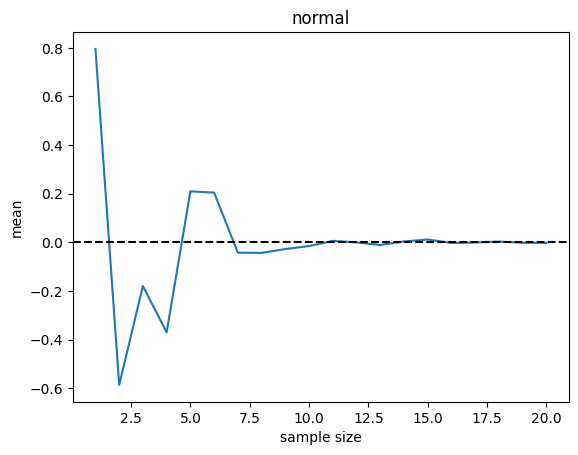

In [4]:
NN = 2 ** np.arange(1, 21)

l1 = LLN_plot("normal");print(l1)

[ 1.49444710e+00  1.01408333e+00 -6.51803314e-03 -2.49811027e-01
  6.53983759e-01  1.52395980e-02 -1.33799541e-01 -8.40924531e-02
  1.59353358e-01 -4.86260620e-02  1.30639387e-01 -9.01518683e-02
 -5.87081779e-03 -1.38217408e-02  1.47138268e-02 -1.63982903e-02
 -1.71291915e-03 -1.05797473e-03  7.53842007e-03  1.12901318e-03]


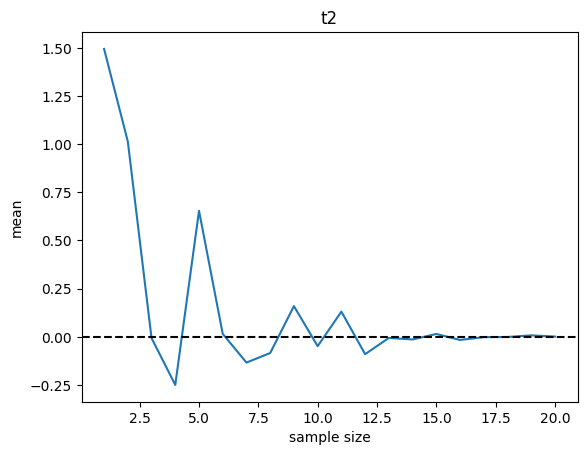

In [5]:
l2 = LLN_plot("t2"); print(l2)

[ 2.06194473 -1.00091955 -0.08561284 -0.17293068  0.8162065   1.42214617
 -0.84755769 -0.2896593  31.50690934  0.99435492 -0.99748829 -5.67645541
  1.17048518 -0.47427727  0.19730101 -4.52358135 -1.71195114 -0.38286911
 -9.41070744 -1.27023955]


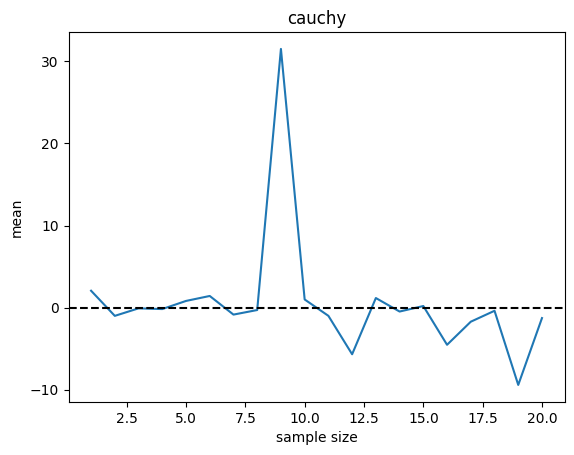

In [6]:
l3 = LLN_plot("cauchy"); print(l3)

Central Limit Theorem
---------------------

The central limit theorem (CLT) is a collection of probability results
about the convergence in distribution to a stable law, usually the normal distribution. 
The basic form of the CLT is: for a sample
$\left(z_{1},\ldots,z_{n}\right)$ of *zero-mean* random variables,
$$
\frac{1}{\sqrt{n}}\sum_{i=1}^{n}z_{i}\stackrel{d}{\to}N\left(0,\sigma^{2}\right).
$$
Various versions of CLT work under different assumptions about the
random variables.

*Lindeberg-Levy CLT* is the simplest CLT.

-   If the sample is i.i.d., $E\left[x_{1}\right]=0$ and
    $\mathrm{var}\left[x_{1}^{2}\right]=\sigma^{2}<\infty$,
    then CLT holds.

Lindeberg-Levy CLT is easy to verify by the characteristic function. For
any random variable $x$, the function
$\varphi_{x}\left(t\right)=E\left[\exp\left(ixt\right)\right]$ is called
its *characteristic function*. The characteristic function fully
describes a distribution, just like PDF or CDF. For example, the
characteristic function of $N\left(\mu,\sigma^{2}\right)$ is
$\exp\left(it\mu-\frac{1}{2}\sigma^{2}t^{2}\right)$.

In [7]:
from scipy import stats

def Z_fun(n, distribution):

  if distribution == "normal":
      x = np.random.normal(size = n)
      z = np.sqrt(n) * np.mean(x)
  elif distribution == "chisq2":
      df = 2
      x = np.random.chisquare(df, size = n )
      z = np.sqrt(n) * ( np.mean(x) - df ) / np.sqrt(2*df)
      
  return z

def CLT_plot(n, distribution):
  Rep = 10000

  ZZ = np.zeros(Rep)

  for i in range(Rep):
    ZZ[i] = Z_fun(n, distribution)

  xbase = np.linspace(-4.0, 4.0, 100)
  plt.plot( xbase, stats.norm.pdf(xbase), color = "red" )
  plt.hist(ZZ, bins = int( Rep ** (1/2) ), density = True )
  plt.show()

  return ZZ


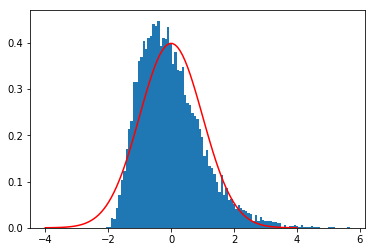

In [11]:
phist = CLT_plot(5, "chisq2")

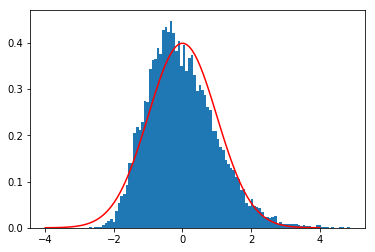

In [12]:
phist = CLT_plot(10, "chisq2")

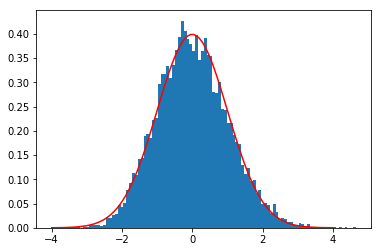

In [13]:
phist = CLT_plot(100, "chisq2")